# Capstone Project: Predicting the need for hospital admittance using machine learning

By: Yash Nagpaul

*(Data Science Diploma Candidate, BrainStation)*

## Table of Contents:
1. <a href="#Introduction">Introduction</a>
2. <a href="#Part-1-—-EDA">Part 1 — EDA</a>
3. <a href="#Part-2-—-Data-Cleaning">Part 2 — Data Cleaning</a>
4. <a href="#Part-3-—-Modeling">Part 3 — Modeling</a>

---
### Introduction
The aim of this report is to predict whether or not a person needs to be admitted to the hospital. We have a dataset of over 560,000 unidentified patients. The dataset consists of 972 unqiue features.

---
### Part 1 — EDA

In [1]:
# import helper libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [70]:
# df = pd.read_csv('./data/admit_data.csv')
df = pd.read_csv('./df_less_columns.csv')
df.head()

,Unnamed: 0,esi,age,disposition,2ndarymalig,abdomhernia,abdomnlpain,abortcompl,acqfootdef,acrenlfail,...,previousdispo_Admit,previousdispo_Discharge,previousdispo_Eloped,previousdispo_LWBS after Triage,previousdispo_LWBS before Triage,previousdispo_No previous dispo,previousdispo_Observation,previousdispo_Send to L&D,previousdispo_Transfer to Another Facility,previousdispo_nan
0,0,4.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,1,4.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,2,2.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
3,3,2.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
4,4,3.0,84.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0


NOTES:
- There seems to be a duplicate index column
- We can do some low effort cleaning along the way during data exploration

In [71]:
# drop duplicate index column
df = df.drop(columns=['Unnamed: 0'])
df.head()

,esi,age,disposition,2ndarymalig,abdomhernia,abdomnlpain,abortcompl,acqfootdef,acrenlfail,acutecvd,...,previousdispo_Admit,previousdispo_Discharge,previousdispo_Eloped,previousdispo_LWBS after Triage,previousdispo_LWBS before Triage,previousdispo_No previous dispo,previousdispo_Observation,previousdispo_Send to L&D,previousdispo_Transfer to Another Facility,previousdispo_nan
0,4.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,4.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,2.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
3,2.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
4,3.0,84.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0


In [4]:
# # work with a 10% sample
# df = df.groupby('disposition').sample(frac=0.1, random_state=42)
# df

# # reset index values since we're working with a random 10% sample
# df.reset_index(drop=True, inplace=True)
# df.head()

In [72]:
# Check for duplicate rows
df.duplicated().sum()

10

In [73]:
# Only 2 rows are duplicates, we can drop the duplicates with confidence because:
# it's an extremely small proprtion of the data, and
# we have over 900 features, which makes it very likely that the duplicate row is not intentional
df.drop_duplicates(inplace=True)

In [67]:
# Deal with the null values.
# From the source of the dataset, we know that there are many missing values.
# To prevent biased imputation, we will drop any columns where more than 10% of the values are missing

# columns_with_nulls = 0
# dropped = 0

# for column in df.columns:
#     if df[column].isna().sum() > 0:
#         columns_with_nulls += 1
#         dots = '.' * (45 - len(df[column].name))
#         print(df[column].name, dots, df[column].isna().sum(), "_____", (df[column].isna().sum()/560484)*100,"%")
        
#         # Drop the column if more than 10% of the values are missing
#         if (df[column].isna().sum()/560484) > .10:
#             df = df.drop(column, axis=1)
#             dropped += 1
            
# print('How many columns with missing values?', columns_with_nulls)
# print('Dropped',dropped,'columns.')

esi .......................................... 2457 _____ 0.43837112210161217 %
age .......................................... 11 _____ 0.001962589476238394 %
absolutelymphocytecount_last ................. 342557 _____ 61.1180693828905 %
acetonebld_last .............................. 560086 _____ 99.92898994440519 %
alanineaminotransferase(alt)_last ............ 434828 _____ 77.58080516125348 %
albumin_last ................................. 448948 _____ 80.10005637984314 %
alkphos_last ................................. 433751 _____ 77.38864980980725 %
anc(absneutrophilcount)_last ................. 340275 _____ 60.710921275183594 %
aniongap_last ................................ 348983 _____ 62.26457847146395 %
aspartateaminotransferase(ast)_last .......... 437523 _____ 78.0616395829319 %
b-typenatriureticpeptide,pro(probnp)_last .... 549573 _____ 98.05328965679662 %
baseexcess(poc)_last ......................... 519333 _____ 92.65795276939217 %
baseexcess,venous(poc)_last ..............

benzodiazepinesscreen,urine,noconf._min ...... 560468 _____ 99.99714532439819 %
bilirubindirect_min .......................... 442217 _____ 78.89913003761035 %
bilirubintotal_min ........................... 374672 _____ 66.84793856738105 %
bun_min ...................................... 316147 _____ 56.406070467667234 %
bun/creatratio_min ........................... 349607 _____ 62.3759108199342 %
calcium_min .................................. 315515 _____ 56.29331078139608 %
calculatedco2(poc)_min ....................... 460171 _____ 82.10243289728163 %
calculatedhco3(poc)i_min ..................... 475914 _____ 84.911255272229 %
calculatedo2saturation(poc)_min .............. 469617 _____ 83.78776200569507 %
chloride_min ................................. 316085 _____ 56.39500859971025 %
cktotal_min .................................. 520142 _____ 92.80229230450826 %
co2_min ...................................... 316138 _____ 56.40446471264122 %
co2calculated,venous(poc)_min ............

d-dimer_max .................................. 533945 _____ 95.2649852627372 %
egfr_max ..................................... 542739 _____ 96.83398634037724 %
egfr(nonafricanamerican)_max ................. 502207 _____ 89.6023793721141 %
egfr(aframer)_max ............................ 519077 _____ 92.61227795976335 %
eos_max ...................................... 312974 _____ 55.83995261238501 %
eosinoabs_max ................................ 510559 _____ 91.09252003625437 %
epithelialcells_max .......................... 560451 _____ 99.99411223157128 %
globulin_max ................................. 387562 _____ 69.14773659908222 %
glucose_max .................................. 316230 _____ 56.42087909735157 %
glucose,meter_max ............................ 480816 _____ 85.78585650973088 %
hco3calculated,venous(poc)_max ............... 535444 _____ 95.53243268318097 %
hematocrit_max ............................... 311510 _____ 55.57874979482019 %
hemoglobin_max ...........................

inr_median ................................... 422747 _____ 75.4253466646684 %
lactate,poc_median ........................... 453323 _____ 80.88063173971068 %
lipase_median ................................ 438740 _____ 78.27877334589391 %
lymphs_median ................................ 312871 _____ 55.82157563819842 %
magnesium_median ............................. 450997 _____ 80.46563327409882 %
mch_median ................................... 310701 _____ 55.434410259704116 %
mchc_median .................................. 310700 _____ 55.434231842479 %
mcv_median ................................... 310648 _____ 55.42495414677314 %
monocytes_median ............................. 312115 _____ 55.6866922160133 %
monosabs_median .............................. 510237 _____ 91.03506968976814 %
mpv_median ................................... 310867 _____ 55.4640275190728 %
neutrophils_median ........................... 312017 _____ 55.66920732795227 %
nrbc_median ................................

cc_edema ..................................... 2585 _____ 0.46120852691602254 %
cc_elbowpain ................................. 2585 _____ 0.46120852691602254 %
cc_elevatedbloodsugar-nosymptoms ............. 2585 _____ 0.46120852691602254 %
cc_elevatedbloodsugar-symptomatic ............ 2585 _____ 0.46120852691602254 %
cc_emesis .................................... 2585 _____ 0.46120852691602254 %
cc_epigastricpain ............................ 2585 _____ 0.46120852691602254 %
cc_epistaxis ................................. 2585 _____ 0.46120852691602254 %
cc_exposuretostd ............................. 2585 _____ 0.46120852691602254 %
cc_extremitylaceration ....................... 2585 _____ 0.46120852691602254 %
cc_extremityweakness ......................... 2585 _____ 0.46120852691602254 %
cc_eyeinjury ................................. 2585 _____ 0.46120852691602254 %
cc_eyepain ................................... 2585 _____ 0.46120852691602254 %
cc_eyeproblem ..........................

How many columns with missing values? 592
Dropped 387 columns.


In [68]:
# df_less_columns = df.to_csv('./df_less_columns.csv')

#### OBSERVATIONS:
- The dataset has a high level of sparsity (many missing values)
- We will need to think of a strategy to deal with this before we start making any predictions

In [74]:
# How many non-numeric columns do we have?

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df.select_dtypes(exclude=numerics).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560472 entries, 0 to 560481
Empty DataFrame

#### NOTES:
- A total of 15 non-numeric columns that either need to be converted to numeric somehow or dropped
---

### Part 2 — Data Cleaning
---
#### `disposition` column
- Convert the column values to binary
- `Admit` = 1
- `Discharge` = 0

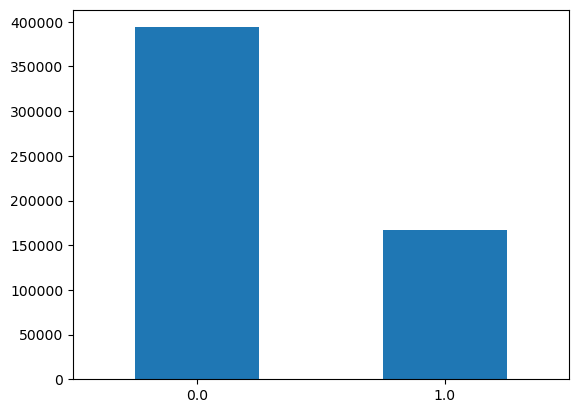

In [75]:
# first, visualize the distribution of classes in our target column

plt.figure()
df['disposition'].value_counts().plot(kind='bar', rot=0)
plt.show()

In [76]:
df['disposition'].value_counts(normalize=True)

0.0    0.702686
1.0    0.297314
Name: disposition, dtype: float64

**Note**: Before splitting the dataset for model training, we will need to account for this imbalance between the classes in our target variable.

In [12]:
# Convert to binary
df['disposition'] = df['disposition'].apply(lambda x: 1 if x == 'Admit' else 0)

# Sanity check
df.tail()

,dep_name,esi,age,gender,ethnicity,race,lang,religion,maritalstatus,employstatus,...,cc_vaginaldischarge,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain
560481,A,2.0,49.0,Male,Non-Hispanic,White or Caucasian,English,Episcopal,Single,Disabled,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
560482,A,3.0,50.0,Male,Non-Hispanic,White or Caucasian,English,Episcopal,Single,Disabled,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
560483,A,3.0,50.0,Male,Non-Hispanic,White or Caucasian,English,Episcopal,Single,Disabled,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
560484,A,3.0,50.0,Male,Non-Hispanic,White or Caucasian,English,Episcopal,Single,Disabled,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
560485,A,3.0,50.0,Male,Non-Hispanic,White or Caucasian,English,Episcopal,Single,Disabled,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### NOTES:
- Doing this process many times will be tedious,
- For the remaining categorical columns, we will write a function that will convert all the categorical variables into dummy variables (one hot encoding)

In [78]:
# make sure none of those columns have an unusually large number of unique values

for column in df.select_dtypes(exclude=numerics).columns:
    print(df[column].value_counts(), '\n')

In [79]:
df.select_dtypes(exclude=numerics).columns

Index([], dtype='object')

In [16]:
for column_name in df.select_dtypes(exclude=numerics).columns:
    
    # creates sparse matrix by default
    encoder = OneHotEncoder(dtype=int)
    
    # make a dataframe from the column
    column_df = pd.DataFrame(df[column_name])
    
    # fit the OneHotEncoder to the column_df and transform the df
    encoded_column = encoder.fit_transform(column_df)
    
    # sparse -> dense
    dense_array = encoded_column.toarray() 
    
    # make a dataframe from the ENCODED column
    encoded_df = pd.DataFrame(dense_array, columns=encoder.get_feature_names_out([column_name]))
    
    # join this encoded_df with the main df
    df = pd.concat([df, encoded_df], axis=1)
    
    # drop the original column from the main df
    df = df.drop(column_name, axis=1)

df.head()

,esi,age,disposition,2ndarymalig,abdomhernia,abdomnlpain,abortcompl,acqfootdef,acrenlfail,acutecvd,...,previousdispo_Admit,previousdispo_Discharge,previousdispo_Eloped,previousdispo_LWBS after Triage,previousdispo_LWBS before Triage,previousdispo_No previous dispo,previousdispo_Observation,previousdispo_Send to L&D,previousdispo_Transfer to Another Facility,previousdispo_nan
0,4.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,4.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,2.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
3,2.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
4,3.0,84.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0


In [17]:
print(f'Through one hot encoding the categorical variables, we have added {1070-972} new columns to our dataframe.')

Through one hot encoding the categorical variables, we have added 98 new columns to our dataframe.


- Now that all of our data is numerical, we are ready to think about making predictions, i.e., modelling
---
Part 3 — Modeling
---
- Before we start fitting any predictive models on our data, we should split the data that we have into 2 groups
- A large subset of the data can be used to train our models, and the remainder (i.e., the test set) can be used to see how the models perform on unseen data

In [80]:
# # Split the dataset into training and test sets

# X_train, X_test, y_train, y_test = train_test_split(
#     df.drop('disposition', axis=1),
#     df['disposition'],
#     test_size=0.15,
#     stratify=df['disposition'],
#     random_state=42
# )

# # Shuffle dataframe using sample function
# df = df.sample(frac=1)

# Select ratio
ratio = 0.85
 
total_rows = df.shape[0]
train_size = int(total_rows*ratio)
 
# Split data into test and train
X_train = df[0:train_size]
X_test = df[train_size:]

y_train = X_train['disposition']
X_train = X_train.drop('disposition', axis=1)  

y_test = X_test['disposition']
X_test = X_test.drop('disposition', axis=1) 

# sanity check
print('Training data shape:', X_train.shape)
print('Test data shape:', X_test.shape)

Training data shape: (476401, 682)
Test data shape: (84071, 682)


In [19]:
# TODO: #1 This would only make sense after the NaN / missing values have been dealt with
# df.corr().unstack().sort_values()

In [20]:
# TODO: #2 XGBoost before imputing
# why does XGBoost not need imputed data?

- We will use the **median** value of the columns with null values to impute the missing data.
- Given the sparsity of the dataset that we have, this is a reasonable approach. 
- The rationale is that many of these columns store continuous data
- This means that if we take another approach such as making dummy variables from the continious data, our model will we will be depriving our models of the information that can be obtained from the ordinality in these continious variables.
- There are other approaches of imputation as well such as using KNNs or Random Forests, but these approaches also rely on finding patterns in the data to estimate missing values, hence they are unlikely to be accurate because of the sparsity of this dataset.

In [81]:
# Use SimpleImputer from SKLearn
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median', missing_values=np.nan)

# fit and transform the training data
X_train = imputer.fit_transform(X_train)

# only transform the test data
X_test = imputer.transform(X_test)

In [82]:
# Scale the data after imputation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit and transform the training set
X_train = scaler.fit_transform(X_train)

# only transform the test set
X_test = scaler.transform(X_test)

In [83]:
# sanity check
print(np.isnan(X_train).sum())
print(np.isnan(X_test).sum())
print(np.isnan(y_train).sum())
print(np.isnan(y_test).sum())

0
0
0
0


#### 3.1 Logistic Regression
- Let's begin with one of the simplest classification models: A Logistic Regression.
    - Briefly described, a logistic regression fits a logistic function on the input variables and outputs the probability of a binary target variable.
- We will use StatsModel to run a linear regression since it gives us statistical details such as p-value of any statistics we might be interested in.
- Then, we can filter out the insignificant variables before fitting other sophisticated machine learning models on our data? There's PCA for that tho
- Here I have opted for the StatsModels library due to the statistical details it provides along with the output (But hang on a second... we are interested more in the predictive modelling rather than p-values, for example)
- So, actually let's go with SKLearn

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

train_acc = logreg.score(X_train, y_train)
test_acc = logreg.score(X_test, y_test)

print('Model accuracy with training data:', round(train_acc*100,2),"%")
print('Model accuracy with test data:', round(test_acc*100,2),"%")

/Users/yashnagpaul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model accuracy with training data: 86.24 %
Model accuracy with test data: 85.03 %


#### DISCUSSION:
- Our first model is ~85% accurate on unseen data!
- That's not bad at all since it's significantly better than what we would get if we simply guessed every disposition as '0' (since 70% of all dispositions in our dataset are '0').
- It is important to note that we dropped over 300 columns since they were missing more than 10% of the values.
- Yet, we are able to achieve an accuracy that is almost at par with the original study.
- I am curious to see which are the top 10 most predictive variables that result in admitting the disposition (i.e., where disposition = 1)

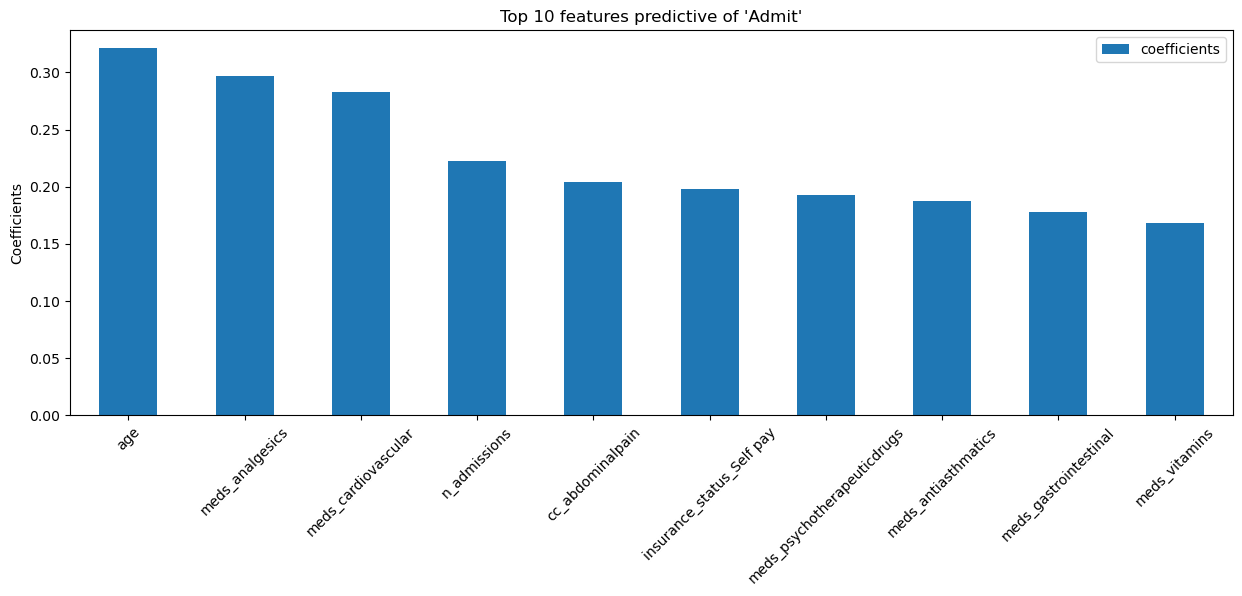

In [97]:
features_df = pd.read_csv('./df_less_columns.csv')
features_df = features_df.drop('disposition', axis=1)
features_df = features_df.drop(columns=['Unnamed: 0'])

feature_counts = pd.DataFrame(
    {
        "coefficients": logreg.coef_[0]
    },
    features_df.columns
).sort_values('coefficients', ascending=False)

feature_counts.head(10).plot(kind='bar', figsize=(15,5), legend=False)
plt.title("Top 10 features predictive of 'Admit'")
plt.ylabel('Coefficients')
plt.xticks(rotation=45)
plt.show()

#### OBSERVATIONS:
- The above chart shows us the top 10 predictors or whether or not an ER visit will result in admittance to the hospital.
- It's not surprising that age is the most significant predictor. The older a patient, the more likely they are to get admitted.

---
Inspite of removing over 300 columns, our dataset is taking quite long to do any modelling.

So, we will reduce the dimensionality of the dataset by using Principal Component Analysis (PCA)
- what pca does #TODO:

In [98]:
from sklearn.decomposition import PCA

# let's say we want to preserve 99
pca = PCA()
pca.fit(X_train)

X_train_PCA = pca.transform(X_train)
X_test_PCA = pca.transform(X_test)

In [99]:
expl_var = pca.explained_variance_ratio_

cumulative_sum = np.cumsum(expl_var)

cumulative_sum

array([0.02406446, 0.03877283, 0.04579817, 0.05211617, 0.05829668,
       0.06412516, 0.06887527, 0.07320234, 0.07709254, 0.08070997,
       0.08425149, 0.08750888, 0.09062601, 0.09362304, 0.09661087,
       0.09950391, 0.10228345, 0.10502442, 0.10768743, 0.11033197,
       0.11288054, 0.11540481, 0.11784569, 0.12026049, 0.12266242,
       0.12499725, 0.12729545, 0.12956749, 0.13182784, 0.13408502,
       0.13631635, 0.13852581, 0.14071942, 0.14288594, 0.14504389,
       0.14716029, 0.14926719, 0.15133976, 0.15339551, 0.15544529,
       0.15746947, 0.15947996, 0.16148741, 0.16348198, 0.16546146,
       0.16743677, 0.16939451, 0.17134322, 0.173287  , 0.17522452,
       0.17714532, 0.17906158, 0.18095498, 0.18284227, 0.18471028,
       0.18657156, 0.18842685, 0.19027667, 0.1921197 , 0.19395825,
       0.19578855, 0.19761009, 0.19943003, 0.20124321, 0.20305207,
       0.2048558 , 0.20665163, 0.20844008, 0.21022503, 0.21200911,
       0.2137865 , 0.21556153, 0.21733335, 0.21910286, 0.22086

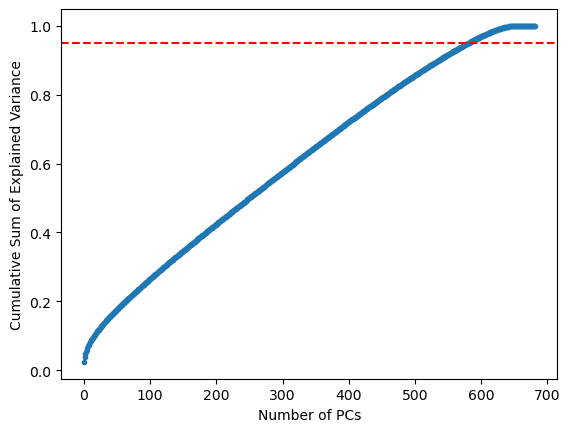

In [101]:
# Plot out the cumulative sum graph

plt.figure()
plt.plot(cumulative_sum, marker='.')
plt.axhline(0.95, c='r', linestyle='--')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Sum of Explained Variance')
plt.show()

#We want to redeuce dimensionality and keep 90% of the variance/information